### 16-10-25

### Replacing values in a data 

In [82]:
import pandas as pd 
data1 = pd.read_csv(
    r"data\product_sales.csv"
)
data1


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [83]:
# checking the unique content inside sales method 
# method1
data1["sales_method"].unique()


array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [84]:
# method2
data1["sales_method"].value_counts()


sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

In [85]:
# Reolacement 
# To match and replace the entire content 
data1["sales_method"] = data1["sales_method"].replace(
    {'em + call':'Email + Call',
     'email':"Email"}
)
# check
data1["sales_method"].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [86]:
# replacing with regular expression 
data1.replace(r"\d","***",regex=True)


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,***e******d*********-******ac-*********b-bbf**...,10,NaN,0,24,Arizona
1,6,Email + Call,************a******d-******f***-******f***-***...,15,225.47,1,28,Kansas
2,5,Call,d***de************-************-************-b...,11,52.55,6,26,Wisconsin
3,4,Email,******aa******a***-ffeb-************-b***d***-...,11,NaN,3,25,Indiana
4,3,Email,******e***d*********-******a***-******e***-***...,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,***************b******-d*********-************...,10,50.82,0,22,Pennsylvania
14996,5,Call,******e******d***f-************-***b******-***...,10,52.33,1,27,Kansas
14997,1,Call,******************cb-******c***-******cb-a****...,7,34.87,4,22,West Virginia
14998,6,Call,e***dad******a-b******b-*********c-***bd***-e*...,13,64.90,2,27,New Jersey


In [87]:
# To match and replace substring use str accessor

data1["sales_method"].replace({"mail":"***"}) # will not work

data1["sales_method"].str.replace("mail","***")

0               E***
1        E*** + Call
2               Call
3               E***
4               E***
            ...     
14995           Call
14996           Call
14997           Call
14998           Call
14999    E*** + Call
Name: sales_method, Length: 15000, dtype: object

In [88]:
# Checking datatye 
data1.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [89]:
# selecting datatype 
data1.select_dtypes(int) # show only column with int data type

,week,nb_sold,years_as_customer,nb_site_visits
0,2,10,0,24
1,6,15,1,28
2,5,11,6,26
3,4,11,3,25
4,3,9,0,28
...,...,...,...,...
14995,4,10,0,22
14996,5,10,1,27
14997,1,7,4,22
14998,6,13,2,27


In [90]:
# selecting datatype 
data1.select_dtypes('object') # show only column with str/object

,sales_method,customer_id,state
0,Email,2e72d641-95ac-497b-bbf8-4861764a7097,Arizona
1,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,Kansas
2,Call,d1de9884-8059-4065-b10f-86eef57e4a44,Wisconsin
3,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,Indiana
4,Email,10e6d446-10a5-42e5-8210-1b5438f70922,Illinois
...,...,...,...
14995,Call,17267b41-d048-4346-8b90-7f787690a836,Pennsylvania
14996,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,Kansas
14997,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,West Virginia
14998,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,New Jersey


In [91]:
# selecting datatype 
data1.select_dtypes('float') # show only column with float

,revenue
0,NaN
1,225.47
2,52.55
3,NaN
4,90.49
...,...
14995,50.82
14996,52.33
14997,34.87
14998,64.90


In [92]:
# selecting datatype 
data1.select_dtypes("number") # show numeric data (both float and int)

,week,nb_sold,revenue,years_as_customer,nb_site_visits
0,2,10,NaN,0,24
1,6,15,225.47,1,28
2,5,11,52.55,6,26
3,4,11,NaN,3,25
4,3,9,90.49,0,28
...,...,...,...,...,...
14995,4,10,50.82,0,22
14996,5,10,52.33,1,27
14997,1,7,34.87,4,22
14998,6,13,64.90,2,27


In [93]:
# changing datatype 
data1.astype({"week":float})
data1["nb_sold"] = data1["nb_sold"].astype(float)
data1
data1.dtypes

data1

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10.0,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15.0,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11.0,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11.0,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9.0,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10.0,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10.0,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7.0,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13.0,64.90,2,27,New Jersey


In [94]:
ss = pd.read_clipboard()
ss

,"data1.groupby([""sales_method"",""week""]"
0,")[[""revenue"",""nb_sold""]].agg([""mean"",""sum"",""ma..."


In [95]:
ss["numbers"].astype(int)

KeyError: 'numbers'

In [ ]:
ss["numbers"] = pd.to_numeric(ss["numbers"],errors="coerce")

### dealing with missing values

In [ ]:
plane = pd.read_csv(r"data\plane_new.csv")
plane
# checking the total number of missing values in a data 
print(plane.isnull().sum())
print(plane.shape)

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
(10660, 9)


In [ ]:
# Removing missing values 
# note that If you remove mising values(NaN), you're removing the entire row

plane.dropna() # to remove all from all column
plane.dropna(subset=["Date_of_Journey","Source"]) # specifying the col


,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,09/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...
10655,Air Asia,09/04/2019,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,3h,non-stop,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648.0


In [ ]:
# Masking the missing value (replacing the NaN)
plane.fillna(0).head(50)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,09/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087.0
5,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087.0
7,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625.0
8,Air India,01/06/2019,Delhi,Cochin,DEL → BLR → COK,13h 15m,1 stop,No info,8907.0
9,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4174.0


In [ ]:
ss.isna().sum()

numbers    2
dtype: int64

In [ ]:
plane.head(50)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,09/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087.0
5,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087.0
7,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625.0
8,Air India,01/06/2019,Delhi,Cochin,DEL → BLR → COK,13h 15m,1 stop,No info,8907.0
9,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4174.0


## Data selection

In [ ]:
# slelcting one column like as df 
data1[["week"]]


,week
0,2
1,6
2,5
3,4
4,3
...,...
14995,4
14996,5
14997,1
14998,6


In [ ]:
# slelcting one column like as series
data1["week"]

0        2
1        6
2        5
3        4
4        3
        ..
14995    4
14996    5
14997    1
14998    6
14999    5
Name: week, Length: 15000, dtype: int64

In [ ]:
# slelcting multiple column (col ONLY)
data1[["week",'sales_method']]

,week,sales_method
0,2,Email
1,6,Email + Call
2,5,Call
3,4,Email
4,3,Email
...,...,...
14995,4,Call
14996,5,Call
14997,1,Call
14998,6,Call


In [ ]:
data1.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [ ]:
data1

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10.0,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15.0,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11.0,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11.0,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9.0,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10.0,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10.0,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7.0,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13.0,64.90,2,27,New Jersey


In [ ]:
# Using loc method  (selecting based on label)
data1.loc[0,"week"] # row 0, column week

np.int64(2)

In [ ]:
data1.loc[0:6,["week","sales_method"]] # row 0, column week and sales_metho

,week,sales_method
0,2,Email
1,6,Email + Call
2,5,Call
3,4,Email
4,3,Email
5,6,Call
6,4,Email


In [ ]:
data1.set_index("sales_method").loc["Email",:]

,week,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
sales_method,,,,,,,
Email,2,2e72d641-95ac-497b-bbf8-4861764a7097,10.0,NaN,0,24,Arizona
Email,4,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11.0,NaN,3,25,Indiana
Email,3,10e6d446-10a5-42e5-8210-1b5438f70922,9.0,90.49,0,28,Illinois
Email,4,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11.0,113.38,9,28,Georgia
Email,1,047df079-071b-4380-9012-2bfe9bce45d5,10.0,99.94,1,22,Oklahoma
...,...,...,...,...,...,...,...
Email,4,de9a4735-aa16-470a-87f5-b518e184469b,11.0,112.01,9,25,Oregon
Email,1,bb4b9fb0-f704-4da5-bc1c-6c3545860430,10.0,97.08,5,22,Hawaii
Email,2,8c9138d0-690b-4709-a279-5e0d4c6429d0,10.0,104.39,1,31,Arkansas


In [ ]:
import pandas as pd 
piza = pd.read_csv(r"data\pizza_types.csv",
                   encoding="latin")
piza["category"].value_counts()

category
Veggie     9
Supreme    9
Classic    8
Chicken    6
Name: count, dtype: int64

In [ ]:
piza.value_counts()

pizza_type_id  name                                        category  ingredients                                                                                      
bbq_ckn        The Barbecue Chicken Pizza                  Chicken   Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  1
big_meat       The Big Meat Pizza                          Classic   Bacon, Pepperoni, Italian Sausage, Chorizo Sausage                                                   1
brie_carre     The Brie Carre Pizza                        Supreme   Brie Carre Cheese, Prosciutto, Caramelized Onions, Pears, Thyme, Garlic                              1
calabrese      The Calabrese Pizza                         Supreme   Nduja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic                           1
cali_ckn       The California Chicken Pizza                Chicken   Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda

In [ ]:
k = pd.read_clipboard()
k

,A,B,C
0,1,r,t
1,2,NaN,NaN
2,2,NaN,NaN
3,t,3,3
4,1,r,t


In [ ]:
k.value_counts()

A  B  C
1  r  t    2
t  3  3    1
Name: count, dtype: int64

In [ ]:
k["B"].value_counts()

B
r    2
3    1
Name: count, dtype: int64

In [ ]:
k["B"].unique()

array(['r', nan, '3'], dtype=object)

In [ ]:
k["B"].nunique() # number of uniq value (will not include nan)

2

In [ ]:
k.nunique()


A    3
B    2
C    2
dtype: int64

In [ ]:
# Data selection (con'd)
# selection with iloc 
piza.iloc[0:5,1:]

,name,category,ingredients
0,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [ ]:
piza.iloc[-5:,-2:]

,category,ingredients
27,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie..."
28,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
29,Veggie,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat..."
30,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
31,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


# filtering 

In [ ]:
# Row and column filter (index filter)
data1.iloc[[10,20,30],:] # manually
data1.filter(regex=r"^\d0$",axis=0)
# for axis= 1 --> column
# for axis= 0 --> row


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
10,3,Email,c40f2602-8a7c-429e-bf13-cb1ec9e5f92f,9,89.49,4,28,Texas
20,1,Email,ad1d8be5-aa0a-41e1-bbc6-7889b4a14521,9,90.51,4,25,Texas
30,2,Call,4a789e3f-76fe-43c9-9c6c-00eccca55954,9,43.13,5,27,Georgia
40,2,Call,9466aca7-ccd7-4be0-85da-a22d301fd5c5,9,43.01,7,29,Florida
50,5,Email + Call,6c62ab37-84d9-40ac-af7e-572bc906de64,13,188.87,0,26,Texas
60,1,Email,e5a3031f-a239-49a3-a157-870b58b458ac,9,86.90,2,18,Oklahoma
70,2,Call,25ba0890-1ca2-4821-916b-e659555b1266,9,45.58,19,24,Kansas
80,5,Email,eb9cfaf4-7f4e-4b76-8028-bec21f5bb3f9,10,104.46,14,18,Maryland
90,1,Email,f1a7d98f-10ee-4850-b75c-79ed68eca614,8,82.94,14,19,North Carolina


In [ ]:
data1.filter(like="_")

,sales_method,customer_id,nb_sold,years_as_customer,nb_site_visits
0,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,0,24
1,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,1,28
2,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,6,26
3,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,3,25
4,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,0,28
...,...,...,...,...,...
14995,Call,17267b41-d048-4346-8b90-7f787690a836,10,0,22
14996,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,1,27
14997,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,4,22
14998,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,2,27


# filering data 

In [ ]:
# method 1 
cond_wk_grater_than_4 = data1["week"] > 4
data1[cond_wk_grater_than_4]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri
...,...,...,...,...,...,...,...,...
14982,5,Email + Call,dde667d0-e963-4a2e-a1b7-f2f341a0d245,13,190.23,2,26,Virginia
14992,5,Email + Call,cd9e6945-ae21-4bed-a6cf-f0302e6c4795,12,NaN,1,34,New York
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [ ]:
data1

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [ ]:
# in pandas:
# ~ means not
# & means and 
# | means or 
# for example 
# creating condition for week = 2 and nb_sold grater than 15 
cond1 = (data1["week"] == 2) & (data1["nb_sold"] > 10)
data1[cond1]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
63,2,Email,7c51acc8-fc18-46b0-a343-0708bf2d2ced,11,105.92,2,21,Florida
110,2,Email + Call,c21cd0cf-c3ab-4e39-8ea0-da55f8f09bc5,11,NaN,3,25,Louisiana
200,2,Email,fb051d02-7a78-4fbb-8eb6-d6e18fd372c4,11,106.49,7,24,Missouri
228,2,Email,20bcccc8-ecee-4e8c-b759-a8adf81f54db,11,105.69,2,29,Texas
271,2,Email,0eb3e785-051f-4a73-8bb4-b512793a570a,11,111.75,9,24,Texas
...,...,...,...,...,...,...,...,...
14409,2,Email,ca449a41-042c-4c9c-b369-66b144c1b6f4,11,108.51,7,16,Massachusetts
14580,2,Email + Call,026570c9-c13a-4487-a326-22f5e866f220,11,157.77,3,30,Wisconsin
14602,2,Email,ee9cd56a-33bd-4a03-83d1-294fdc2147f7,11,107.75,8,26,Arizona
14856,2,Email,56938ab3-bed9-4721-bf76-b6e59c98dbdc,11,109.28,0,24,California


In [ ]:
cond1 = ~(data1["week"] == 2) & (data1["nb_sold"] > 10) #not week 2
data1[cond1]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
...,...,...,...,...,...,...,...,...
14984,4,Email + Call,e599ac4d-4634-49a6-b373-04c021d3a1ab,12,180.71,9,28,South Carolina
14992,5,Email + Call,cd9e6945-ae21-4bed-a6cf-f0302e6c4795,12,NaN,1,34,New York
14994,4,Email,56f02e26-3633-427d-8c4e-f45f00afa787,11,109.36,3,25,Ohio
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [ ]:
cond2 = data1["nb_sold"].gt(11) # greater than
data1[cond2]
# explore lt, eq, le, ge 


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
17,6,Email + Call,d10690f0-6f63-409f-a1da-8ab0e5388390,15,NaN,0,24,Wisconsin
28,5,Email,f64f8fd5-e9b7-4326-9f5d-ef283f14d7ad,12,NaN,4,32,Florida
34,5,Email + Call,4a7ca51d-34c7-4fd2-a90f-c9104b636269,13,190.39,8,26,Illinois
...,...,...,...,...,...,...,...,...
14982,5,Email + Call,dde667d0-e963-4a2e-a1b7-f2f341a0d245,13,190.23,2,26,Virginia
14984,4,Email + Call,e599ac4d-4634-49a6-b373-04c021d3a1ab,12,180.71,9,28,South Carolina
14992,5,Email + Call,cd9e6945-ae21-4bed-a6cf-f0302e6c4795,12,NaN,1,34,New York
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [ ]:
data1
# where there is missing vale inside revenue
cond4 = data1["revenue"].isnull() 
data1[cond4]
# filtering for multiple content
cond5 = data1["state"].isin(['New Jersey', 'Connecticut'])
data1[cond5]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
71,5,Email,0e8e3182-292f-490a-bec5-f67969f73a7e,10,102.82,6,25,New Jersey
72,5,Call,b494929e-92ac-4b49-9bfa-f9b82cb65408,10,52.44,10,29,Connecticut
89,1,Call,a1651d36-f88a-4535-882b-40f132bd72a0,7,33.63,3,16,Connecticut
92,2,Email,6ffdca0f-8054-4d1f-99cb-5b510a1e57cf,10,100.38,2,28,New Jersey
119,2,Email,fddf0d18-4f0b-4d28-b5f3-bb459fc9e0c4,10,96.02,4,23,Connecticut
...,...,...,...,...,...,...,...,...
14757,5,Email + Call,0e4ed78c-c11c-481a-9a6c-fc6ad3426bf3,12,187.43,3,29,Connecticut
14793,4,Email,21433c66-15cc-4e76-bf2a-a1c2003c73d7,11,106.05,10,30,New Jersey
14946,1,Call,56533105-95ce-4bfd-8a3f-71e73bc5aa20,7,34.48,9,19,New Jersey
14983,1,Email + Call,bec6d233-f7ad-401f-9c2e-54fed5ce2937,9,131.39,2,23,Connecticut


In [ ]:
data1["state"].unique()

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

# sorting

In [ ]:
# sorting by contents 
# by default it is in ascending order 
data1.sort_values(by=["nb_sold"])

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
7067,1,Call,9d23a71d-e56c-4b50-a4e6-8a4b94fbf228,7,34.49,6,19,Connecticut
773,1,Call,12218b83-b91d-4af2-94bb-736cd08be4ec,7,34.59,3,18,Montana
770,1,Call,ac19b19e-e614-4b1e-a985-f0d9082209e1,7,35.88,14,21,Virginia
12422,1,Call,bca40539-2036-492a-acd6-a0b638897a87,7,34.37,12,16,Ohio
11572,1,Call,244fb05a-7013-4d07-8908-160eb419996a,7,34.02,30,18,Illinois
...,...,...,...,...,...,...,...,...
4374,6,Email + Call,80644239-745b-41e7-883a-21350495db46,16,232.83,2,32,Texas
4238,6,Email + Call,68c72896-b99a-44e8-89ac-061ef612f20e,16,235.59,6,32,North Carolina
14054,6,Email + Call,26b35552-0d19-4e8b-bdf8-c9bd3b9dba68,16,NaN,3,29,Michigan
213,6,Email + Call,00dc7276-7b92-4642-9d24-69c841286964,16,232.86,1,33,Michigan


In [ ]:
data1.sort_values(by=["nb_sold"],ascending=False)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
5591,6,Email + Call,aafa1bb4-aea8-45c7-9704-9d732d8bcb6f,16,232.79,2,32,New Jersey
1760,6,Email + Call,4aba322a-0532-4925-b7ae-c51d9dc359ef,16,232.89,3,36,Florida
1743,6,Email + Call,7fc56abe-dbf1-418a-988c-08e33ebe30bd,16,233.39,1,32,Oregon
735,6,Email + Call,0002aed1-1a1f-4b20-845f-7a4b8cc9977a,16,237.19,2,29,California
575,6,Email + Call,a0b8123a-0f92-4152-8ea0-cc732e452f49,16,234.03,6,29,California
...,...,...,...,...,...,...,...,...
7362,1,Call,e8415eca-907b-4044-85f3-7669635a1140,7,37.04,4,24,Michigan
9837,1,Call,3d283da1-0682-4185-a060-803455a895a3,7,34.35,1,17,Illinois
1049,1,Call,5ea7c95e-b714-4cd2-a939-9781a0e0cef0,7,32.54,3,18,Oklahoma
1078,1,Call,6c79f598-7229-483e-ab8d-da685a466e9d,7,32.62,12,16,Michigan


In [ ]:
pip install pyjanitor

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# reordering columns 
import janitor
nw = data1.reorder_columns(["week","nb_sold",
                      "years_as_customer",
                      "state"])

In [ ]:
# sorting by multiple colums 
nw.sort_values(by=["week",
                   "nb_sold",
                   "state"],
                   ascending=[True,False,False])

,week,nb_sold,years_as_customer,state,sales_method,customer_id,revenue,nb_site_visits
4948,1,11,12,Virginia,Email,883c8bfb-1570-477d-8370-d6a7831395dc,107.82,28
6255,1,11,1,Utah,Email,f1ef38f4-0ff1-4bad-9957-a841c30884c4,107.35,23
9315,1,11,8,Rhode Island,Email,4bb01624-d67b-42f0-aa35-358675715746,109.33,27
8835,1,11,8,Pennsylvania,Email,e924b1d4-6514-4881-9665-e6b0a4ccb836,NaN,26
13293,1,11,2,Oregon,Email,cfd0d12c-b2f9-4998-bdc1-422cdc500352,112.05,25
...,...,...,...,...,...,...,...,...
4055,6,12,4,North Carolina,Email,45dcbdb2-1a0f-42d5-9a5e-5ce026e89c19,124.05,31
5434,6,12,7,North Carolina,Email,fc9f725b-16d1-4a65-b99d-e16eac635fd8,124.68,33
2061,6,12,0,Nevada,Email,0ae38940-6579-415e-9439-07785c6d846b,124.47,33
7244,6,12,1,Georgia,Email,69d4912a-9ac0-4b44-88db-2aadfb1f7c20,124.64,26


In [ ]:
vv = pd.read_clipboard()
vv

,first name,other names,FATther's Occupation,Wieves
0,gjg,ela,capenter,NaN
1,NaN,NaN,NaN,NaN
2,jj,okocha,NaN,NaN
3,NaN,NaN,NaN,NaN
4,gh,hjh,kyhjh,NaN
5,dyh,jgj,hhg,NaN


In [ ]:
vv.clean_names()

,first_name,other_names,fatthers_occupation,wieves
0,gjg,ela,capenter,NaN
1,NaN,NaN,NaN,NaN
2,jj,okocha,NaN,NaN
3,NaN,NaN,NaN,NaN
4,gh,hjh,kyhjh,NaN
5,dyh,jgj,hhg,NaN


In [ ]:
vv.remove_empty(reset_index=False)

,first name,other names,FATther's Occupation
0,gjg,ela,capenter
2,jj,okocha,NaN
4,gh,hjh,kyhjh
5,dyh,jgj,hhg


In [ ]:
vv.remove_columns
# del data1["week"]
data1

,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...
14995,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [ ]:
# sorting by index/column
data1 = data1.sample(frac=1)
data1

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
14944,2,Email,7e53f18f-3fea-4c6b-8630-8e11463404f7,10,102.38,7,33,Oregon
11159,5,Email + Call,172b5399-02cf-472c-b8d4-8054eee81b98,13,189.11,11,24,Oregon
3250,6,Email + Call,4937abea-eb2f-4cc2-b918-7c1106e3f277,15,227.82,0,33,Georgia
8413,3,Call,8279fe04-e1a1-4424-bf77-62651f0f0dd8,8,NaN,2,19,Ohio
1889,6,Email + Call,a26a2539-ba55-4b4d-b927-24180457d2bd,15,226.41,7,35,Kansas
...,...,...,...,...,...,...,...,...
6353,5,Email + Call,b1ab3e83-2d73-4f7c-997b-a62985ee5381,12,186.71,6,28,Texas
10796,5,Email + Call,2e6716a3-3fd3-454d-b974-96395529a3ac,13,187.86,1,25,Pennsylvania
1480,1,Email,abf3a27c-0637-4a8d-903b-1ff5d8e22bbc,9,90.16,2,24,Virginia
13492,1,Email,dab5b5b7-a4a2-4431-94f3-9345f8d5fce8,8,82.70,1,23,California


In [ ]:
# sorting by index 
data1.sort_index(ascending=False).loc[1:5,:]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [ ]:
data1

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
14944,2,Email,7e53f18f-3fea-4c6b-8630-8e11463404f7,10,102.38,7,33,Oregon
11159,5,Email + Call,172b5399-02cf-472c-b8d4-8054eee81b98,13,189.11,11,24,Oregon
3250,6,Email + Call,4937abea-eb2f-4cc2-b918-7c1106e3f277,15,227.82,0,33,Georgia
8413,3,Call,8279fe04-e1a1-4424-bf77-62651f0f0dd8,8,NaN,2,19,Ohio
1889,6,Email + Call,a26a2539-ba55-4b4d-b927-24180457d2bd,15,226.41,7,35,Kansas
...,...,...,...,...,...,...,...,...
6353,5,Email + Call,b1ab3e83-2d73-4f7c-997b-a62985ee5381,12,186.71,6,28,Texas
10796,5,Email + Call,2e6716a3-3fd3-454d-b974-96395529a3ac,13,187.86,1,25,Pennsylvania
1480,1,Email,abf3a27c-0637-4a8d-903b-1ff5d8e22bbc,9,90.16,2,24,Virginia
13492,1,Email,dab5b5b7-a4a2-4431-94f3-9345f8d5fce8,8,82.70,1,23,California


In [ ]:
data1.sort_index().loc[1:5,:]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi


In [ ]:
data1.sort_index(axis=1).loc[:,"customer_id":"revenue"]

,customer_id,nb_site_visits,nb_sold,revenue
14944,7e53f18f-3fea-4c6b-8630-8e11463404f7,33,10,102.38
11159,172b5399-02cf-472c-b8d4-8054eee81b98,24,13,189.11
3250,4937abea-eb2f-4cc2-b918-7c1106e3f277,33,15,227.82
8413,8279fe04-e1a1-4424-bf77-62651f0f0dd8,19,8,NaN
1889,a26a2539-ba55-4b4d-b927-24180457d2bd,35,15,226.41
...,...,...,...,...
6353,b1ab3e83-2d73-4f7c-997b-a62985ee5381,28,12,186.71
10796,2e6716a3-3fd3-454d-b974-96395529a3ac,25,13,187.86
1480,abf3a27c-0637-4a8d-903b-1ff5d8e22bbc,24,9,90.16
13492,dab5b5b7-a4a2-4431-94f3-9345f8d5fce8,23,8,82.70


In [ ]:
data1 = data1.sample(frac=1,axis=1)
data1.loc[:,"customer_id":"revenue"]

""
14944
11159
3250
8413
1889
...
6353
10796
1480
13492


# Column creation

In [ ]:
data1["my_col"] = 1
data1["state_in caps"] = data1["state"].str.upper()
data1
data1["rubiss"] = data1["sales_method"] + "***" + data1["state"]
data1

,nb_sold,nb_site_visits,week,sales_method,state,revenue,years_as_customer,customer_id,my_col,state_in caps,rubiss
14944,10,33,2,Email,Oregon,102.38,7,7e53f18f-3fea-4c6b-8630-8e11463404f7,1,OREGON,Email***Oregon
11159,13,24,5,Email + Call,Oregon,189.11,11,172b5399-02cf-472c-b8d4-8054eee81b98,1,OREGON,Email + Call***Oregon
3250,15,33,6,Email + Call,Georgia,227.82,0,4937abea-eb2f-4cc2-b918-7c1106e3f277,1,GEORGIA,Email + Call***Georgia
8413,8,19,3,Call,Ohio,NaN,2,8279fe04-e1a1-4424-bf77-62651f0f0dd8,1,OHIO,Call***Ohio
1889,15,35,6,Email + Call,Kansas,226.41,7,a26a2539-ba55-4b4d-b927-24180457d2bd,1,KANSAS,Email + Call***Kansas
...,...,...,...,...,...,...,...,...,...,...,...
6353,12,28,5,Email + Call,Texas,186.71,6,b1ab3e83-2d73-4f7c-997b-a62985ee5381,1,TEXAS,Email + Call***Texas
10796,13,25,5,Email + Call,Pennsylvania,187.86,1,2e6716a3-3fd3-454d-b974-96395529a3ac,1,PENNSYLVANIA,Email + Call***Pennsylvania
1480,9,24,1,Email,Virginia,90.16,2,abf3a27c-0637-4a8d-903b-1ff5d8e22bbc,1,VIRGINIA,Email***Virginia
13492,8,23,1,Email,California,82.70,1,dab5b5b7-a4a2-4431-94f3-9345f8d5fce8,1,CALIFORNIA,Email***California


In [ ]:
data1["week x 2"] = data1["week"] *2
data1 ["state"] = data1["state"].str[:3].str.upper()


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,week x 2
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,ARI,4
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,KAN,12
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,WIS,10
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,IND,8
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,ILL,6
...,...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,PEN,8
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,KAN,10
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,WES,2
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,NEW,12


In [ ]:
data1["sales_method"] = data1["sales_method"].str.replace(r"[A-Z]","***",regex=True)
data1

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,week x 2
0,2,***mail,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,ARI,4
1,6,***mail + ***all,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,KAN,12
2,5,***all,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,WIS,10
3,4,***mail,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,IND,8
4,3,***mail,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,ILL,6
...,...,...,...,...,...,...,...,...,...
14995,4,***all,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,PEN,8
14996,5,***all,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,KAN,10
14997,1,***all,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,WES,2
14998,6,***all,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,NEW,12


In [ ]:
qq = pd.read_clipboard()
qq


,Product,Price
0,sd card,$67
1,mm,#76
2,tt,55 Yen
3,ry,67 naira


In [ ]:
qq["Price"] = qq["Price"].str.replace(r"\D","",regex=True)

qq

,Product,Price
0,sd card,67
1,mm,76
2,tt,55
3,ry,67


In [ ]:
qq = qq.astype({"Price":"float"})
qq

,Product,Price
0,sd card,67.0
1,mm,76.0
2,tt,55.0
3,ry,67.0


In [ ]:
yy = pd.read_clipboard()
yy["full name"] = yy["F_name"] + " " + yy["Surname"]
yy

,F_name,Surname,full name
0,Ade,Ikechukwu,Ade Ikechukwu
1,Ewa,Ibrahim,Ewa Ibrahim
2,Fola,Aderogba,Fola Aderogba


0    IKECHUKWU
1      IBRAHIM
2     ADEROGBA
Name: Surname, dtype: object

In [ ]:
# Data transformation with map and apply method 
# 1. apply 
# with function defined 
def caps(series):
    return series.str.upper()
yy.apply (caps)
# with anonymous fuc 
yy.apply(lambda x: x.str.upper())

,F_name,Surname,full name
0,ADE,IKECHUKWU,ADE IKECHUKWU
1,EWA,IBRAHIM,EWA IBRAHIM
2,FOLA,ADEROGBA,FOLA ADEROGBA


In [ ]:
# 2. map 
# with defined func 
def uper (txt):
    return txt.upper()
yy.map(uper)
# with anonymous fuc 
yy.map(lambda x: x.upper())

,F_name,Surname,full name
0,ADE,IKECHUKWU,ADE IKECHUKWU
1,EWA,IBRAHIM,EWA IBRAHIM
2,FOLA,ADEROGBA,FOLA ADEROGBA


In [ ]:
import janitor
qq.transform_columns(column_names=["Product"],function=uper)

,Product,Price
0,SD CARD,67.0
1,MM,76.0
2,TT,55.0
3,RY,67.0


# Conditional column creatin 

In [ ]:
rec = pd.read_clipboard()
rec

,Student name,Student ID,Department,Exam date,Score,status,Campus
0,Jacob Greer,1016-0027,Mathematics,20/10/2022,31,Fail,Main
1,Gisela Robertson,1009-0006,Chemistry,15/10/2022,34,Fail,Distance
2,Ryan Herman,1009-0010,Chemistry,15/10/2022,100,Pass,Distance
3,Ryder Combs,1016-0013,Mathematics,20/10/2022,56,Pass,Main
4,Georgia Gomez,1032-0007,Sociology,26/10/2022,32,Fail,Main
...,...,...,...,...,...,...,...
195,Cora Frazier,1009-0011,Chemistry,15/10/2022,92,Pass,Main
196,Alec Pittman,1016-0018,Mathematics,20/10/2022,38,Fail,Distance
197,Cora Fuentes,1027-0005,Physics,26/10/2022,20,Fail,Main
198,Ezra Brooks,1024-0034,Philosophy,24/10/2022,56,Pass,Distance


In [ ]:
# SENARIO: Withdraw any main campus in math department that fail 
# getting the details with filtering using querry method 
rec.query(
    """
    Department == 'Mathematics' 
    and 
    Score < 50 
    and 
    Campus == 'Main'

""".replace("\n","")
)

,Student name,Student ID,Department,Exam date,Score,status,Campus
0,Jacob Greer,1016-0027,Mathematics,20/10/2022,31,Fail,Main
6,Burke Horn,1016-0023,Mathematics,20/10/2022,6,Fail,Main
8,Aimee Eaton,1016-0007,Mathematics,20/10/2022,23,Fail,Main
23,Burton Holden,1016-0036,Mathematics,20/10/2022,26,Fail,Main
63,Jonas Vinson,1016-0035,Mathematics,20/10/2022,40,Fail,Main
65,Cally Wilkinson,1016-0025,Mathematics,20/10/2022,14,Fail,Main
78,Keefe Schneider,1016-0001,Mathematics,20/10/2022,48,Fail,Main
145,Kasper Ballard,1016-0002,Mathematics,20/10/2022,5,Fail,Main


In [ ]:
# creating the conditional col 
cond_1 = rec["Campus"] == "Main" # from main campus
cond_2 = rec["Department"] == "Mathematics" # from math depart
cond_3 = rec ["Score"] < 50 # failed
all_cond = cond_1 & cond_2 & cond_3 
import numpy as np 
rec["Withdrawal status"] = np.where(
    all_cond,"Withdraw","Retain"
)
rec.head(50)

,Student name,Student ID,Department,Exam date,Score,status,Campus,Withdrawal status
0,Jacob Greer,1016-0027,Mathematics,20/10/2022,31,Fail,Main,Withdraw
1,Gisela Robertson,1009-0006,Chemistry,15/10/2022,34,Fail,Distance,Retain
2,Ryan Herman,1009-0010,Chemistry,15/10/2022,100,Pass,Distance,Retain
3,Ryder Combs,1016-0013,Mathematics,20/10/2022,56,Pass,Main,Retain
4,Georgia Gomez,1032-0007,Sociology,26/10/2022,32,Fail,Main,Retain
5,Daryl Tillman,1024-0017,Philosophy,24/10/2022,65,Pass,Distance,Retain
6,Burke Horn,1016-0023,Mathematics,20/10/2022,6,Fail,Main,Withdraw
7,Rina Slater,1002-0018,Botany,10/05/2022 00:00,78,Pass,Main,Retain
8,Aimee Eaton,1016-0007,Mathematics,20/10/2022,23,Fail,Main,Withdraw
9,Meredith Parsons,1009-0003,Chemistry,15/10/2022,32,Fail,Main,Retain


In [ ]:
# rec["Department"].unique()
# SENARIO: score btwn 80 - 100 -> Bio science
#         score btwn 60 - 79 -> Physical science
#         score btwn 50 - 59 -> Art 
#         score < 50 -> no admisssion 
#         Math & phy -> phsical sci 
#         Chem & Bot - Bio science
#         Socilogy & phil - Arts

array(['Mathematics', 'Chemistry', 'Sociology', 'Philosophy', 'Botany',
       'Physics'], dtype=object)

In [ ]:
cond_a1 = rec["Department"].isin(['Chemistry','Botany'])
cond_a2 = rec["Score"].between(80,100) 
cond_b1 = rec["Department"].isin(['Mathematics','Physics'])
cond_b2 = rec["Score"].between(60,79) 
cond_c1 = rec["Department"].isin(["Sociology",'Philosophy'])
cond_c2 = rec["Score"].between(50,59) 
cond_A = cond_a1 & cond_a2
cond_B = cond_b1 & cond_b2
cond_C = cond_c1 & cond_c2
output = ["Admit to Bio sci","Admit to physical sci","Admit to Arts"]
rec["Admission status"] = np.select(
    [cond_A,cond_B,cond_C],
    output,
    "Not addmitted")
rec

,Student name,Student ID,Department,Exam date,Score,status,Campus,Withdrawal status,Admission status
0,Jacob Greer,1016-0027,Mathematics,20/10/2022,31,Fail,Main,Withdraw,Not addmitted
1,Gisela Robertson,1009-0006,Chemistry,15/10/2022,34,Fail,Distance,Retain,Not addmitted
2,Ryan Herman,1009-0010,Chemistry,15/10/2022,100,Pass,Distance,Retain,Admit to Bio sci
3,Ryder Combs,1016-0013,Mathematics,20/10/2022,56,Pass,Main,Retain,Not addmitted
4,Georgia Gomez,1032-0007,Sociology,26/10/2022,32,Fail,Main,Retain,Not addmitted
...,...,...,...,...,...,...,...,...,...
195,Cora Frazier,1009-0011,Chemistry,15/10/2022,92,Pass,Main,Retain,Admit to Bio sci
196,Alec Pittman,1016-0018,Mathematics,20/10/2022,38,Fail,Distance,Retain,Not addmitted
197,Cora Fuentes,1027-0005,Physics,26/10/2022,20,Fail,Main,Retain,Not addmitted
198,Ezra Brooks,1024-0034,Philosophy,24/10/2022,56,Pass,Distance,Retain,Admit to Arts


In [ ]:
rec["Student name"].str.contains("roony")

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Student name, Length: 200, dtype: bool

# Join

In [ ]:
import pandas as pd 
jd = pd.read_excel(
    r"C:\Users\Dell\Desktop\bt\jjj.xlsx",
    sheet_name=None # as dict
)
cust,prod,order,oi = jd.values()
cust.merge(order,
                     on="CustomerID",
                    #  how="left" INNER
                     )

,CustomerID,FullName,City,Gender,OrderID,OrderDate
0,1,Amina Bello,Lagos,F,1,01-11-2024
1,1,Amina Bello,Lagos,F,4,04-11-2024
2,2,John Okoro,Abuja,M,3,03-11-2024
3,3,Clara Johnson,Port Harcourt,F,2,02-11-2024
4,4,David Musa,Kano,M,5,05-11-2024


In [ ]:
cust.merge(cust,
                     on="CustomerID",
                     how="left",
                     indicator=True,
                     validate="m:m"
                     )

,CustomerID,FullName_x,City_x,Gender_x,FullName_y,City_y,Gender_y,_merge
0,1,Amina Bello,Lagos,F,Amina Bello,Lagos,F,both
1,2,John Okoro,Abuja,M,John Okoro,Abuja,M,both
2,3,Clara Johnson,Port Harcourt,F,Clara Johnson,Port Harcourt,F,both
3,4,David Musa,Kano,M,David Musa,Kano,M,both
4,5,Peace Eze,Anambra,F,Peace Eze,Anambra,F,both
5,6,Tolu Adelabu,Abeokuta,M,Tolu Adelabu,Abeokuta,M,both


In [ ]:
cust.merge(order,
                     on="CustomerID",
                     how="right" 
                     )

,CustomerID,FullName,City,Gender,OrderID,OrderDate
0,1,Amina Bello,Lagos,F,1,01-11-2024
1,3,Clara Johnson,Port Harcourt,F,2,02-11-2024
2,2,John Okoro,Abuja,M,3,03-11-2024
3,1,Amina Bello,Lagos,F,4,04-11-2024
4,4,David Musa,Kano,M,5,05-11-2024


In [ ]:
cust.merge(order,
                     on="CustomerID",
                     how="outer" 
                     )

,CustomerID,FullName,City,Gender,OrderID,OrderDate
0,1,Amina Bello,Lagos,F,1.0,01-11-2024
1,1,Amina Bello,Lagos,F,4.0,04-11-2024
2,2,John Okoro,Abuja,M,3.0,03-11-2024
3,3,Clara Johnson,Port Harcourt,F,2.0,02-11-2024
4,4,David Musa,Kano,M,5.0,05-11-2024
5,5,Peace Eze,Anambra,F,NaN,NaN
6,6,Tolu Adelabu,Abeokuta,M,NaN,NaN


In [ ]:
ful_tab = cust.merge(order,
                     on="CustomerID",
                     how="inner" 
                     ).merge(
                         oi,
                         on="OrderID"
                     ).merge(
                         prod,
                         on="ProductID"
                     )
ful_tab

,CustomerID,FullName,City,Gender,OrderID,OrderDate,ProductID,Quantity,ProductName,Category,Price
0,1,Amina Bello,Lagos,F,1,01-11-2024,101,2,Rice (50kg),Food,35000
1,1,Amina Bello,Lagos,F,1,01-11-2024,103,4,Toothpaste,Toiletries,500
2,1,Amina Bello,Lagos,F,4,04-11-2024,106,2,Detergent (1kg),Toiletries,1200
3,2,John Okoro,Abuja,M,3,03-11-2024,102,1,Palm Oil (10L),Food,12000
4,3,Clara Johnson,Port Harcourt,F,2,02-11-2024,104,10,Notebook (A4),Stationery,300
5,4,David Musa,Kano,M,5,05-11-2024,105,3,Bathing Soap,Toiletries,400


In [ ]:
# Joinig on column name that are not spelled the same 
prod.merge(oi,right_on="ProductID",
           left_on="prod_id")

,prod_id,ProductName,Category,Price,OrderID,ProductID,Quantity
0,101,Rice (50kg),Food,35000,1,101,2
1,102,Palm Oil (10L),Food,12000,3,102,1
2,103,Toothpaste,Toiletries,500,1,103,4
3,104,Notebook (A4),Stationery,300,2,104,10
4,105,Bathing Soap,Toiletries,400,5,105,3
5,106,Detergent (1kg),Toiletries,1200,4,106,2


In [ ]:
# Adding suffix 
kk = prod.merge(oi,right_on="ProductID",
           left_on="prod_id",
           suffixes=["_pro","_oi"])
kk

,prod_id,ProductName,Category,Price,Quantity_pro,OrderID,ProductID,Quantity_oi
0,101,Rice (50kg),Food,35000,2,1,101,2
1,102,Palm Oil (10L),Food,12000,4,3,102,1
2,103,Toothpaste,Toiletries,500,10,1,103,4
3,104,Notebook (A4),Stationery,300,1,2,104,10
4,105,Bathing Soap,Toiletries,400,2,5,105,3
5,106,Detergent (1kg),Toiletries,1200,3,4,106,2


In [ ]:
# Merging by index 
obj_only = kk.select_dtypes("object") 
num_only = kk.select_dtypes("number") # both float & int 
obj_only = obj_only.map(str.upper)
num_only = num_only.map(lambda x: x*100)
num_only
# Join them back 
obj_only.merge(
    num_only,
    right_index=True,
    left_index=True
)

,ProductName,Category,prod_id,Price,Quantity_pro,OrderID,ProductID,Quantity_oi
0,RICE (50KG),FOOD,10100,3500000,200,100,10100,200
1,PALM OIL (10L),FOOD,10200,1200000,400,300,10200,100
2,TOOTHPASTE,TOILETRIES,10300,50000,1000,100,10300,400
3,NOTEBOOK (A4),STATIONERY,10400,30000,100,200,10400,1000
4,BATHING SOAP,TOILETRIES,10500,40000,200,500,10500,300
5,DETERGENT (1KG),TOILETRIES,10600,120000,300,400,10600,200


In [ ]:
?pd.DataFrame.merge

Signature:
pd.DataFrame.merge(
    self,
    right: 'DataFrame | Series',
    how: 'MergeHow' = 'inner',
    on: 'IndexLabel | AnyArrayLike | None' = None,
    left_on: 'IndexLabel | AnyArrayLike | None' = None,
    right_on: 'IndexLabel | AnyArrayLike | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool | None' = None,
    indicator: 'str | bool' = False,
    validate: 'MergeValidate | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

.. warning::


In [ ]:
j1 = pd.read_clipboard()

In [ ]:
j2 = pd.read_clipboard()

In [ ]:
pd.concat([j1,j2],
        #   ignore_index=True, reset index after concat
        # axis=0
        keys=["jss1","jss2"],
        
          )

Name  score
jss1 0   ade     76
     1  sere     32
jss2 0   ife     32
     1   ema     56

# Aggregate statistics

In [ ]:
data1["revenue"].mean() #average
data1["revenue"].std() # standard deviatin
data1["revenue"].count()  # total num of nun-null value
data1["revenue"].sum()  # add all
data1["revenue"].min()  
data1["revenue"].max()
data1["revenue"].agg(["mean","median","std"])

mean      93.934943
median    89.500000
std       47.435312
Name: revenue, dtype: float64

# Data shaping

In [ ]:
import pandas as pd 
jd = pd.read_excel(
    r"C:\Users\Dell\Desktop\bt\jjj.xlsx",
    sheet_name=None # as dict
)
cust,prod,order,oi = jd.values()
cust

,CustomerID,FullName,City,Gender
0,1,Amina Bello,Lagos,F
1,2,John Okoro,Abuja,M
2,3,Clara Johnson,Port Harcourt,F
3,4,David Musa,Kano,M
4,5,Peace Eze,Anambra,F
5,6,Tolu Adelabu,Abeokuta,M


In [ ]:
# transpose 
cust.T

,0,1,2,3,4,5
CustomerID,1,2,3,4,5,6
FullName,Amina Bello,John Okoro,Clara Johnson,David Musa,Peace Eze,Tolu Adelabu
City,Lagos,Abuja,Port Harcourt,Kano,Anambra,Abeokuta
Gender,F,M,F,M,F,M


In [ ]:
cust["City"].to_frame().T

,0,1,2,3,4,5
City,Lagos,Abuja,Port Harcourt,Kano,Anambra,Abeokuta


In [ ]:
# unpivoting / melt
lng_fmt = cust.melt(value_name="uuu",
                    var_name="yyy")
lng_fmt

,yyy,uuu
0,CustomerID,1
1,CustomerID,2
2,CustomerID,3
3,CustomerID,4
4,CustomerID,5
5,CustomerID,6
6,FullName,Amina Bello
7,FullName,John Okoro
8,FullName,Clara Johnson
9,FullName,David Musa


In [ ]:
cust.melt(id_vars=["FullName"],
          value_vars=["City"],
          )

,FullName,variable,value
0,Amina Bello,City,Lagos
1,John Okoro,City,Abuja
2,Clara Johnson,City,Port Harcourt
3,David Musa,City,Kano
4,Peace Eze,City,Anambra
5,Tolu Adelabu,City,Abeokuta


In [ ]:
cust.melt(id_vars=["FullName","CustomerID"],
          value_vars=["City","Gender"])

,FullName,CustomerID,variable,value
0,Amina Bello,1,City,Lagos
1,John Okoro,2,City,Abuja
2,Clara Johnson,3,City,Port Harcourt
3,David Musa,4,City,Kano
4,Peace Eze,5,City,Anambra
5,Tolu Adelabu,6,City,Abeokuta
6,Amina Bello,1,Gender,F
7,John Okoro,2,Gender,M
8,Clara Johnson,3,Gender,F
9,David Musa,4,Gender,M


In [ ]:
# pivoting 
lng_fmt["id"] = list(range(6)) * lng_fmt["yyy"].nunique()
lng_fmt.pivot(index="id",
              columns="yyy",
              values="uuu")

yyy,City,CustomerID,FullName,Gender
id,,,,
0,Lagos,1,Amina Bello,F
1,Abuja,2,John Okoro,M
2,Port Harcourt,3,Clara Johnson,F
3,Kano,4,David Musa,M
4,Anambra,5,Peace Eze,F
5,Abeokuta,6,Tolu Adelabu,M


In [ ]:
cust["nw_col"] = range(6)
cust.columns.name = "jjj"
cust.index.name = "ppp"
cust

jjj,CustomerID,FullName,City,Gender,nw_col
ppp,,,,,
0,1,Amina Bello,Lagos,F,0
1,2,John Okoro,Abuja,M,1
2,3,Clara Johnson,Port Harcourt,F,2
3,4,David Musa,Kano,M,3
4,5,Peace Eze,Anambra,F,4
5,6,Tolu Adelabu,Abeokuta,M,5


In [ ]:
#groupby
data1.groupby("sales_method")["revenue"].sum()

sales_method
Call            227563.49
Email           671630.75
Email + Call    404787.15
em + call         3469.54
email              687.08
Name: revenue, dtype: float64

In [ ]:
data1.groupby(["sales_method","week"]
              )["revenue"].agg(["mean","sum","max"])

mean        sum     max
sales_method week                               
Call         1      35.350243   26159.18   40.47
             2      43.602606   33792.02   50.19
             3      41.759528   36247.27   50.66
             4      51.446048   49593.99   57.74
             5      53.146087   53518.11   58.01
             6      66.166089   28252.92   71.36
Email        1      87.495976  229589.44  112.88
             2     100.139121  137891.57  124.24
             3      92.764882   98609.07  117.46
             4     108.878947  107572.40  137.65
             5     108.887859   74261.52  135.43
             6     130.976519   23706.75  148.97
Email + Call 1     128.917769   16759.31  136.36
             2     154.256588   26223.62  164.14
             3     150.440872   48291.52  159.55
             4     180.857283   77226.06  192.09
             5     187.608051  125134.57  198.32
             6     227.770635  111152.07  238.32
em + call    1     126.020000     126.02  126.02
             2     152.610000     152.61  152.61
             3     148.540000     445.62  150.47
             4     178.356667    1070.14  181.52
             5     186.127778    1675.15  190.90
email        1      88.055000     176.11   95.39
             2            NaN       0.00     NaN
             3      91.535000     183.07   92.19
             4     107.985000     215.97  109.72
             5     111.930000     111.93  111.93

In [ ]:
data1["sales_method"].sum()

'EmailEmail + CallCallEmailEmailCallEmailEmailEmailCallEmailCallCallEmailCallEmailEmailEmail + CallEmailEmailEmailEmail + Callem + callEmailCallCallEmailEmail + CallEmailCallCallEmailCallCallEmail + CallEmailCallEmailEmailCallCallEmailEmailEmailCallEmailEmailEmailCallEmailEmail + CallEmailCallCallEmailCallCallCallEmailEmailEmailCallCallEmailEmailEmailCallEmailCallEmailCallEmailCallCallEmailCallEmailEmailCallEmailEmailCallEmail + CallEmail + CallCallEmailCallEmailCallCallEmailEmailEmailEmail + CallEmailEmailCallCallEmail + CallEmail + CallEmailCallEmail + CallEmail + CallEmailEmailCallCallEmailEmailEmail + CallEmailCallCallEmail + CallCallEmailEmail + CallEmailEmailEmailEmailEmailEmailCallEmailEmailEmail + CallCallEmailCallEmailCallEmail + CallCallCallCallCallEmail + CallEmail + CallCallEmailCallEmail + CallCallEmailEmailEmailCallEmailEmailEmail + CallEmail + CallCallEmailEmail + CallCallEmail + CallEmailCallEmail + CallEmailEmailEmailEmailEmailEmail + CallEmailEmail + CallCallEmailEmai

In [ ]:
data1.groupby(["sales_method","week"]
              )[["revenue","nb_sold"]].agg(["mean","sum","max"])

revenue                       nb_sold           
                         mean        sum     max       mean    sum max
sales_method week                                                     
Call         1      35.350243   26159.18   40.47   7.079156   5366   8
             2      43.602606   33792.02   50.19   8.804969   7088  10
             3      41.759528   36247.27   50.66   8.266075   7456  10
             4      51.446048   49593.99   57.74  10.207960  10259  12
             5      53.146087   53518.11   58.01  10.659962  11129  12
             6      66.166089   28252.92   71.36  13.145089   5889  14
Email        1      87.495976  229589.44  112.88   8.729115  24555  11
             2     100.139121  137891.57  124.24  10.061953  14942  12
             3      92.764882   98609.07  117.46   9.285714  10660  12
             4     108.878947  107572.40  137.65  10.916900  11692  14
             5     108.887859   74261.52  135.43  10.924528   8106  14
             6     130.976519   23706.75  148.97  13.111675   2583  15
Email + Call 1     128.917769   16759.31  136.36   8.659864   1273   9
             2     154.256588   26223.62  164.14  10.080402   2006  11
             3     150.440872   48291.52  159.55  10.011236   3564  11
             4     180.857283   77226.06  192.09  12.040984   5876  13
             5     187.608051  125134.57  198.32  12.476804   9682  13
             6     227.770635  111152.07  238.32  15.053173   8776  16
em + call    1     126.020000     126.02  126.02   8.000000      8   8
             2     152.610000     152.61  152.61  10.000000     10  10
             3     148.540000     445.62  150.47  10.000000     30  10
             4     178.356667    1070.14  181.52  12.000000     84  12
             5     186.127778    1675.15  190.90  12.272727    135  13
email        1      88.055000     176.11   95.39   9.000000     18  10
             2            NaN       0.00     NaN  10.000000     10  10
             3      91.535000     183.07   92.19   9.000000     18   9
             4     107.985000     215.97  109.72  11.000000     44  11
             5     111.930000     111.93  111.93  11.000000     11  11

In [96]:
data1.groupby(["sales_method","week"]
              ).agg(
                  avg_rev=("revenue","mean"),
                  min_nb_sold=("nb_sold","min"),
                  no_state=("state","count")
              )

avg_rev  min_nb_sold  no_state
sales_method week                                   
Call         1      35.350243          7.0       758
             2      43.602606          8.0       805
             3      41.759528          8.0       902
             4      51.446048         10.0      1005
             5      53.146087         10.0      1044
             6      66.166089         13.0       448
Email        1      87.496401          8.0      2815
             2     100.139121          9.0      1486
             3      92.762573          8.0      1150
             4     108.877141         10.0      1075
             5     108.892313         10.0       743
             6     130.976519         12.0       197
Email + Call 1     128.895649          8.0       148
             2     154.246959         10.0       200
             3     150.423272         10.0       359
             4     180.822633         12.0       495
             5     187.588343         12.0       787
             6     227.770635         15.0       583

In [76]:
data1

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [100]:
# crosstabulation
pd.crosstab(data1["week"],
            data1["sales_method"],
            normalize=False,
            margins=True)

sales_method,Call,Email,Email + Call,All
week,,,,
1,758,2815,148,3721
2,805,1486,200,2491
3,902,1150,359,2411
4,1005,1075,495,2575
5,1044,743,787,2574
6,448,197,583,1228
All,4962,7466,2572,15000


# Date & Time in Python 

In [ ]:
import datetime as dt 
date1 = dt.date(2025,5,3)
type(date1)
datetime1 = dt.datetime(2025,2,12,11,44,12)
type(datetime1)
date1.day # tell me the day
date1.month
date1.strftime("%m-%B")
date1.strftime("%d")
datetime1.toordinal()
print(dt.datetime.fromtimestamp(65734573))
datetime1.timestamp()
dt.datetime.strptime("2025-11-04","%Y-%m-%d")

'03'

In [94]:
import pandas as pd 
nb = pd.read_csv(
    r"C:\Users\Dell\Documents\data\nobel.csv"
)
nb.dtypes
# nb["birth_date"] = pd.to_datetime(nb["birth_date"])
nb = nb.dropna()
filt_cond = nb["birth_date"].str.contains(r"\d{4}-00-00",regex=True)
nb = nb[~filt_cond]
nb["birth_date"] = pd.to_datetime(nb["birth_date"])
nb.dtypes
# use date accessor (dt) when working with date column 
nb["birth_date"].dt.strftime("%Y") # year(4 digits)

nb["birth_date"].dt.strftime("%m") # month in 2 digits
nb["birth_date"].dt.strftime("%d") # day in 2 digits
nb["birth_date"].dt.strftime("%A") # day name in full
nb["birth_date"].dt.strftime("%a") # day name in short
nb["birth_date"].dt.strftime("%B") # month name in full 
nb["birth_date"].dt.strftime("%b") # month name in short
nb["birth_date"].dt.strftime("%c") # full datetimee (include day name)
nb["birth_date"].dt.strftime("%C") # century
nb["birth_date"].dt.strftime("%D") # like mm/dd/yy(in 2 digits)
nb["birth_date"].dt.strftime("%e") # day in 1 digit but uses 2 with 2 digit day
nb["birth_date"].dt.strftime("%E") # full datetime yyyy-mm-dd-HH-MM-SS
nb["birth_date"].dt.strftime("%g") # year in 2 digits
# nb["birth_date"].dt.strftime("%E") # day name in short
nb["birth_date"].dt.strftime("%G") # year in 4 
nb["birth_date"].dt.strftime("%j") # nth day in a year


0      243
2      074
5      086
6      283
8      133
      ... 
833    033
836    270
856    153
925    245
942    206
Name: birth_date, Length: 406, dtype: object

In [100]:
ex = pd.read_clipboard()
ex

,A,B,C
0,5646,16/06/1915,"Wed, 16 of June, 1915"
1,4646,19/09/1912,"Thu, 19 of September, 1912"
2,3646,24/12/1909,"Fri, 24 of December, 1909"
3,2646,30/03/1907,"Sat, 30 of March, 1907"
4,1646,03/07/1904,"Sun, 03 of July, 1904"
5,646,07/10/1901,"Mon, 07 of October, 1901"
6,-354,19/12/1900,"Wed, 19 of December, 1900"
7,-1354,15/09/1903,"Tue, 15 of September, 1903"
8,-2354,11/06/1906,"Mon, 11 of June, 1906"


In [97]:
ex.dtypes

A     int64
B    object
C    object
dtype: object

In [102]:
ex["B"] = pd.to_datetime(ex["B"],format="%d/%m/%Y")
ex

,A,B,C
0,5646,1915-06-16,"Wed, 16 of June, 1915"
1,4646,1912-09-19,"Thu, 19 of September, 1912"
2,3646,1909-12-24,"Fri, 24 of December, 1909"
3,2646,1907-03-30,"Sat, 30 of March, 1907"
4,1646,1904-07-03,"Sun, 03 of July, 1904"
5,646,1901-10-07,"Mon, 07 of October, 1901"
6,-354,1900-12-19,"Wed, 19 of December, 1900"
7,-1354,1903-09-15,"Tue, 15 of September, 1903"
8,-2354,1906-06-11,"Mon, 11 of June, 1906"


In [116]:
ex["C"] = pd.to_datetime(ex["C"],format="%a, %d of %B, %Y")
ex["C"].between("1920","1950")

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: C, dtype: bool

In [9]:
import pandas as pd 
accident = pd.read_csv(
    r"C:\Users\Dell\Desktop\bt\NYC Accidents 2020.csv"
)
import janitor
accident = accident.clean_names()
accident
accident["date_time"] = accident["crash_date"] + " " + accident["crash_time"]
accident

C:\Users\Dell\AppData\Local\Temp\ipykernel_15376\2420218945.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident["date_time"] = accident["crash_date"] + " " + accident["crash_time"]


,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,date_time
0,2020-08-29,15:40:00,BRONX,10466.0,40.892100,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2020-08-29 15:40:00
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.690500,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN,2020-08-29 21:00:00
2,2020-08-29,18:20:00,NaN,NaN,40.816500,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2020-08-29 18:20:00
3,2020-08-29,00:00:00,BRONX,10459.0,40.824720,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN,2020-08-29 00:00:00
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.649890,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN,2020-08-29 17:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74876,2020-01-01,15:13:00,BRONX,10459.0,40.826810,-73.896510,POINT (-73.89651 40.82681),NaN,NaN,1122 INTERVALE AVENUE,...,NaN,NaN,NaN,4268088,Sedan,NaN,NaN,NaN,NaN,2020-01-01 15:13:00
74877,2020-01-01,08:00:00,BROOKLYN,11235.0,40.582935,-73.959210,POINT (-73.95921 40.582935),NaN,NaN,3401 GUIDER AVENUE,...,Unspecified,NaN,NaN,4267756,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,2020-01-01 08:00:00
74878,2020-01-01,11:36:00,BRONX,10461.0,40.848553,-73.830055,POINT (-73.830055 40.848553),NaN,NaN,1810 MAHAN AVENUE,...,NaN,NaN,NaN,4269230,Sedan,Pick-up Truck,NaN,NaN,NaN,2020-01-01 11:36:00
74879,2020-01-01,01:45:00,MANHATTAN,10017.0,40.753624,-73.969440,POINT (-73.96944 40.753624),EAST 48 STREET,2 AVENUE,NaN,...,NaN,NaN,NaN,4267482,Sedan,Taxi,NaN,NaN,NaN,2020-01-01 01:45:00


<Axes: xlabel='mont_of_acc'>

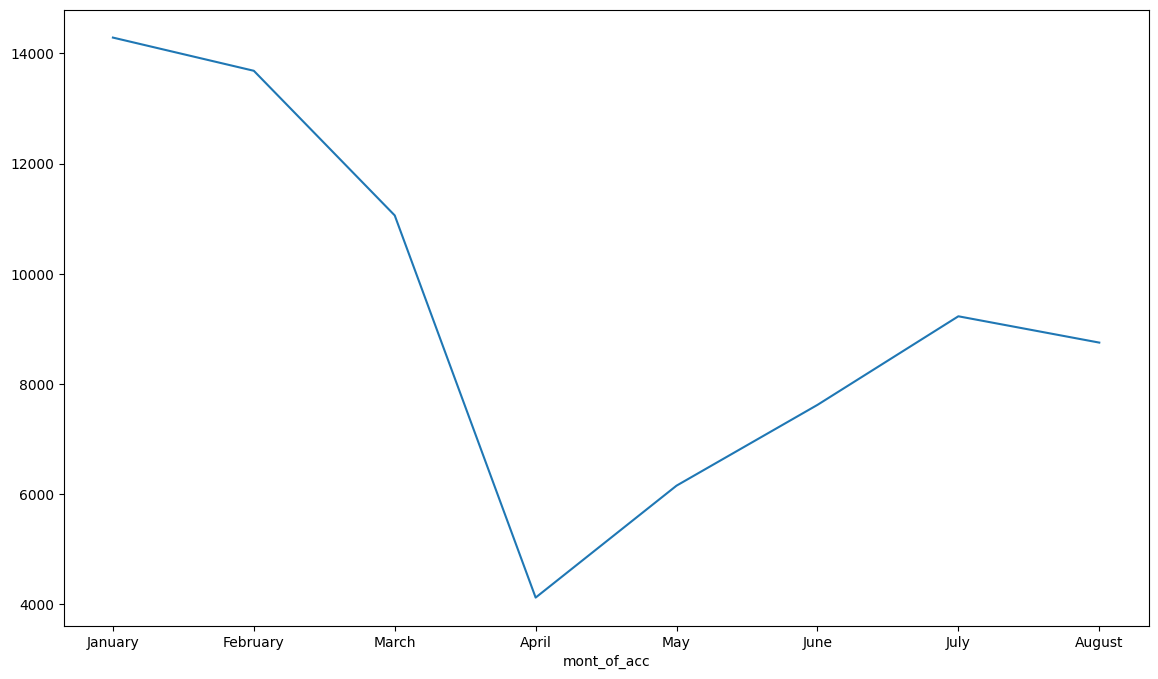

In [32]:
accident["date_time"] = pd.to_datetime(
    accident["date_time"],format="%Y-%m-%d %H:%M:%S"
)
accident["mont_of_acc"] = accident["date_time"].dt.month_name()
import calendar
months = list(calendar.month_name)[1:-4]
accident["mont_of_acc"] = pd.Categorical(
    accident["mont_of_acc"],months,ordered=True
)
accident["mont_of_acc"].value_counts(sort=False).plot(figsize=(14,8))


In [34]:
accident["mont_of_acc"].value_counts(sort=False,normalize=True)

mont_of_acc
January     0.190796
February    0.182743
March       0.147661
April       0.054967
May         0.082117
June        0.101708
July        0.123195
August      0.116812
Name: proportion, dtype: float64

In [41]:
accident["mont_of_acc"].value_counts(sort=False,normalize=True).map(
    lambda x: f"{x:.2%}"
)

mont_of_acc
January     19.08%
February    18.27%
March       14.77%
April        5.50%
May          8.21%
June        10.17%
July        12.32%
August      11.68%
Name: proportion, dtype: object

In [44]:
accident["season"] = accident["mont_of_acc"].map(
    lambda x:
    "Winter" if x in ["December","January","February"]
    else "spring" if x in ["March","April","May"]
    else "Summer"
)
accident["season"].value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

season
Winter    37.35%
Summer    34.17%
spring    28.47%
Name: proportion, dtype: object

In [54]:
accident["day"] = accident["date_time"].dt.day_name()
accident["day"].value_counts()
accident["hour"] = accident["date_time"].dt.hour
accident["hour"].value_counts()
accident.groupby(["day","hour"])["date_time"].count().sort_values(ascending=False)

day        hour
Friday     16      870
           14      815
Thursday   16      814
Friday     17      804
           18      800
                  ... 
Wednesday  4       103
Tuesday    3        96
           2        88
Thursday   3        78
Tuesday    4        78
Name: date_time, Length: 168, dtype: int64